In [243]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [244]:
data_test = pd.read_csv("train.csv")
print("Number of datapoints:", len(data_test))
data_test.head()

Number of datapoints: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [245]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [246]:
#Found Null Values on Age, Fare and Cabin
data_test.isnull().sum()

missing_percentage = (data_test.isnull().sum() / len(data_test))*100
print(missing_percentage)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


Missing Completely at Random (MCAR)
- No reason for missing values
Missing at Random (MAR)
- Missing values are not random
Missing Not at Random (MNAR)
- Missing values depend on unobserved data

In [247]:
meanAge = data_test['Age'].mean()
data_test['Age'].fillna(value=meanAge, inplace=True)

meanFare = data_test['Fare'].mean()
data_test['Fare'].fillna(value=meanFare, inplace=True)

data_test = data_test.drop('Cabin',axis=1)

In [248]:
data_test.isnull().sum()

missing_percentage = (data_test.isnull().sum() / len(data_test))*100
print(missing_percentage)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64


In [249]:
data_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [250]:
#Feature Engineering
data_test['FamilyCount'] = data_test['Parch'] + data_test['SibSp']

# for index, row in data_test.iterrows():
#     if(row['FamilyCount'] == 0):
#         data_test['FamilySize'] = 'Alone'
    # elif(row['FamilyCount'] >= 1 and row['FamilyCount'] < 3 ):
    #     data_test['FamilySize'] = 'Small'
    # elif(row['FamilyCount'] >= 3 and row['FamilyCount'] < 5 ):
    #     data_test['FamilySize'] = 'Medium'
    # elif(row['FamilyCount'] >= 5 and row['FamilyCount'] < 7 ):
    #     data_test['FamilySize'] = 'Large'


data_test['FamilyStatus'] = data_test['FamilyCount'].apply(lambda x: 0 if x == 0 else (1 if x >= 1 and x < 3 else (2 if x >= 3 and x < 5 else 3)))

#Alone = 0
#Small = 1
#Medium = 2 
#Large = 3

data_test['Sex'] = data_test['Sex'].apply(lambda x: 0 if x == 'female' else 1)

#female = 0
#male = 1

data_test['name_title'] = data_test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [251]:
data_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilyCount,FamilyStatus,name_title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,1,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,1,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,1,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0,0,Mr


In [252]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    int64  
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Embarked      889 non-null    object 
 11  FamilyCount   891 non-null    int64  
 12  FamilyStatus  891 non-null    int64  
 13  name_title    891 non-null    object 
dtypes: float64(2), int64(8), object(4)
memory usage: 97.6+ KB


In [253]:
s = (data_test.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Name', 'Ticket', 'Embarked', 'name_title']


In [254]:
LE=LabelEncoder()
for i in object_cols:
    data_test[i]=data_test[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [255]:
#Scaling
scaler = StandardScaler()
scaler.fit(data_test)
scaled_ds = pd.DataFrame(scaler.transform(data_test),columns= data_test.columns )
print("All features are now scaled")

All features are now scaled


### Dimensionality Reduction


### Clustering Reduction


Elbow Method to determine the number of clusters to be formed:


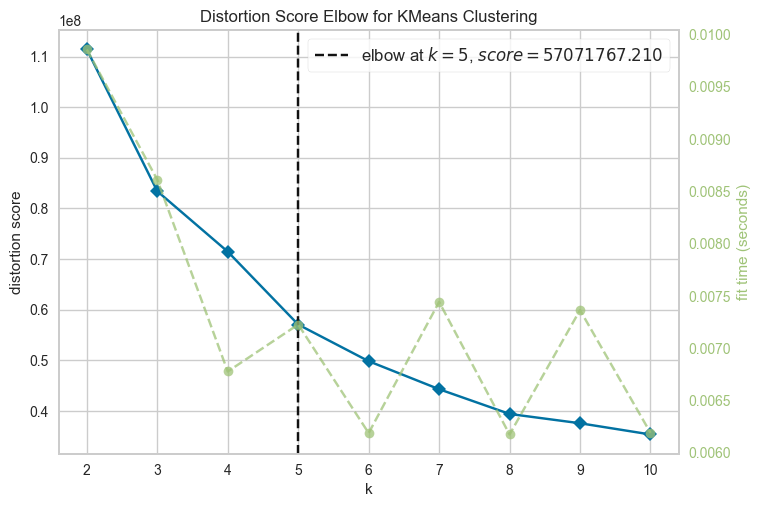

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [256]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_test)
Elbow_M.show()

In [266]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat_AC = AC.fit_predict(data_test)
data_test["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data_test["Clusters"]= yhat_AC

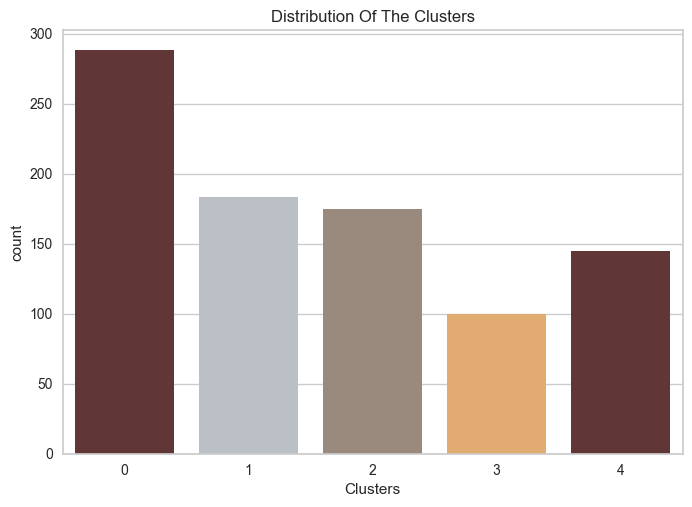

In [267]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data_test["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

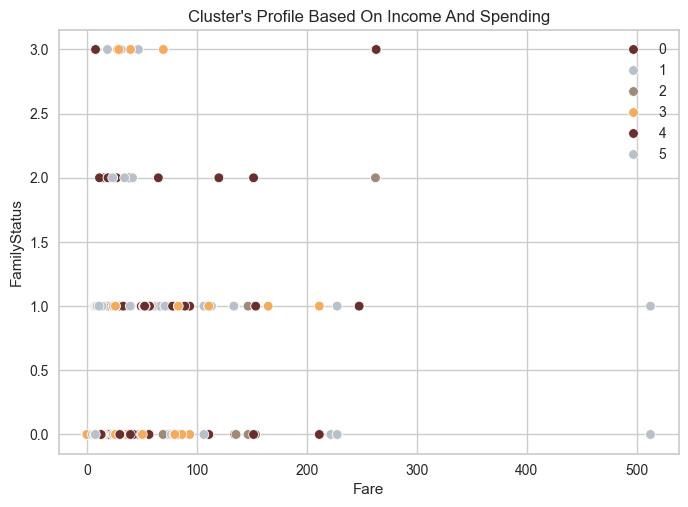

In [263]:
pl = sns.scatterplot(data = data_test,x=data_test["Fare"], y=data_test["FamilyStatus"],hue=data_test["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [265]:
data_test.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilyCount,FamilyStatus,name_title,Clusters
0,1,0,3,108,1,22.000000,1,0,523,7.2500,2,1,1,11,0
1,2,1,1,190,0,38.000000,1,0,596,71.2833,0,1,1,12,0
2,3,1,3,353,0,26.000000,0,0,669,7.9250,2,0,0,8,0
3,4,1,1,272,0,35.000000,1,0,49,53.1000,2,1,1,12,0
4,5,0,3,15,1,35.000000,0,0,472,8.0500,2,0,0,11,0
5,6,0,3,554,1,29.699118,0,0,275,8.4583,1,0,0,11,2
6,7,0,1,515,1,54.000000,0,0,85,51.8625,2,0,0,11,5
7,8,0,3,624,1,2.000000,3,1,395,21.0750,2,4,2,7,2
8,9,1,3,412,0,27.000000,0,2,344,11.1333,2,2,1,12,2
9,10,1,2,576,0,14.000000,1,0,132,30.0708,0,1,1,12,5
